# Assignment: Data Visualization

#### Import Libraries

In [1]:
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    ! pip install pandas matplotlib seaborn

#### Import Dataset
#### Note
- Provided Data is merged with the data on kaggle it starts from ```id``` 1 up to 1309 

In [2]:
titanic_df = pd.read_csv(r".\Data\Titanic.csv")

## Methodology

To effectively extract useful statistics from the Titanic dataset, it's essential to first understand what each column represents:

| **Column**     | **Description**                                                                 |
|----------------|----------------------------------------------------------------------------------|
| `PassengerId`  | A unique identifier for each passenger (just an index number).                  |
| `Survived`     | Survival status: `1` = Survived, `0` = Did not survive.                         |
| `Pclass`       | Passenger class: `1` = 1st (Upper), `2` = 2nd (Middle), `3` = 3rd (Lower).       |
| `Name`         | Full name of the passenger (includes title like Mr., Mrs., Miss, etc.).         |
| `Sex`          | Gender of the passenger (`male` or `female`).                                   |
| `Age`          | Age of the passenger (in years). Missing values are possible.                   |
| `SibSp`        | Number of siblings (brothers or sisters) and/or spouse (husband or wife) that the passenger had with them on the Titanic.                               |
| `Parch`        | Number of the passenger’s parents (mother or father) and/or children (son or daughter) who were also on board the Titanic.                              |
| `Ticket`       | Ticket number (may contain letters and numbers, not necessarily unique).        |
| `Fare`         | Amount of money the passenger paid for the ticket.                              |
| `Cabin`        | Cabin number (if known). Many values are missing.                               |
| `Embarked`     | Port where the passenger boarded the ship. See breakdown below.                 |

### Breakdown of the `Embarked` Column

Each letter in the `Embarked` column corresponds to a specific port:

- **`S` = Southampton** *(🇬🇧 United Kingdom)*  
  → Majority of passengers (~72%) embarked here.

- **`C` = Cherbourg** *(🇫🇷 France)*

- **`Q` = Queenstown** *(now Cobh, 🇮🇪 Ireland)*

## Spread Of Data

### Age Vs Gender Spread

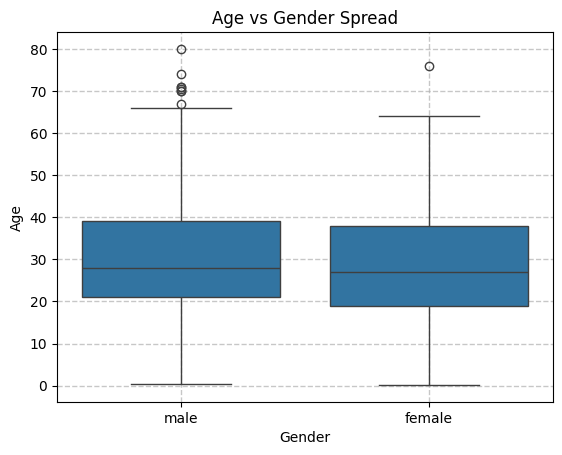

In [3]:
sns.boxplot(x="Sex", y="Age", data=titanic_df)


# Title of Graph
plt.title("Age vs Gender Spread")

# X axis Label
plt.xlabel("Gender")

# Y axis Label
plt.ylabel("Age")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Gender Vs Fare Spread

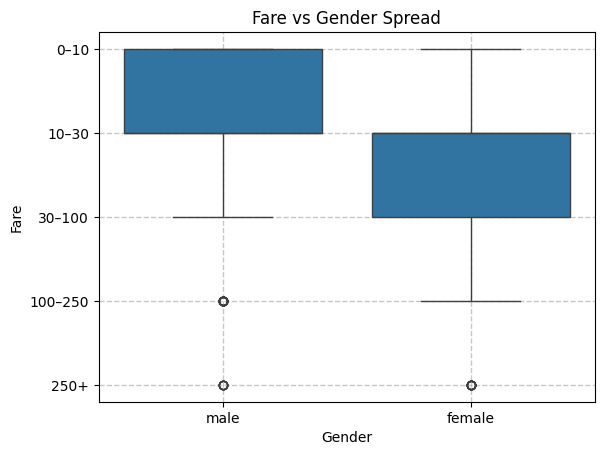

In [13]:
titanic_df['FareRange'] = pd.cut(titanic_df['Fare'], bins=[0, 10, 30, 100, 250, 600], 
                                 labels=["0–10", "10–30", "30–100", "100–250", "250+"])
ax = sns.boxplot(x="Sex", y="FareRange", data=titanic_df)

# ax.set_ylim(0, 50)
# ax.set_yticks(list(range(0, 100, 25)))

# Title of Graph
plt.title("Fare vs Gender Spread")

# X axis Label
plt.xlabel("Gender")

# Y axis Label
plt.ylabel("Fare")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Coleration Between Diffrenent Elements

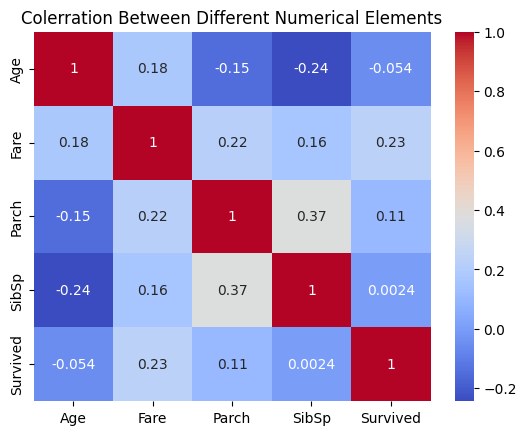

In [5]:
sns.heatmap(titanic_df[["Age", "Fare", "Parch", "SibSp", "Survived"]].corr(), annot=True, cmap="coolwarm")

# Title of Graph
plt.title("Colerration Between Different Numerical Elements")

# Show Graph
plt.show()

## Demographics Statistics

### How Many Survived More (Male Or Female) and How Many Died More

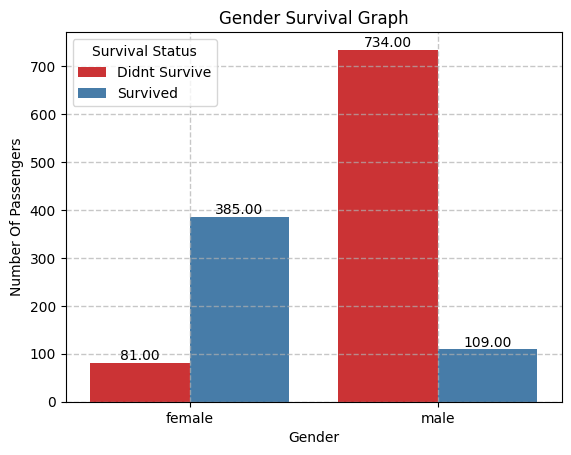

In [6]:
# Get Who Survived and didnt Survive Between The Two Genders 
gender_survival = titanic_df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Make A column Representing Status ('What Each Value Means in Survived')
gender_survival['Survival Status'] = ['Survived' if x == 1 else 'Didnt Survive' for x in gender_survival['Survived']]

# Give Parameters Of Plotting Graph
ax = sns.barplot(data=gender_survival, x='Sex', y='Count',  hue='Survival Status', palette='Set1')

# Add Numbers Above Each Par
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# Title of Graph
plt.title("Gender Survival Graph")

# X axis Label
plt.xlabel("Gender")

# Y axis Label
plt.ylabel("Number Of Passengers")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Does Age and Fare Affects Survival Or Not 

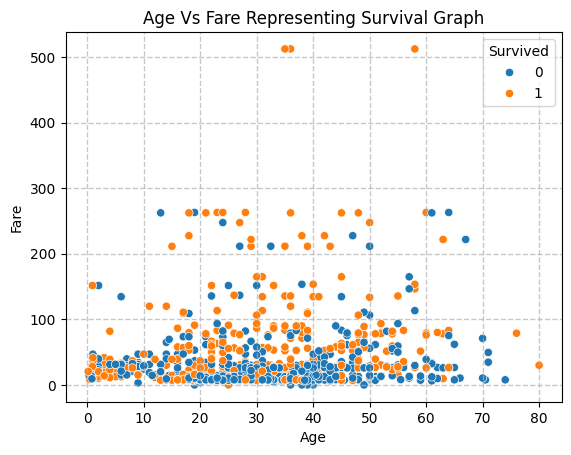

In [7]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic_df)

# Title of Graph
plt.title("Age Vs Fare Representing Survival Graph")

# X axis Label
plt.xlabel("Age")

# Y axis Label
plt.ylabel("Fare")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Which Age Paid More Fare Range

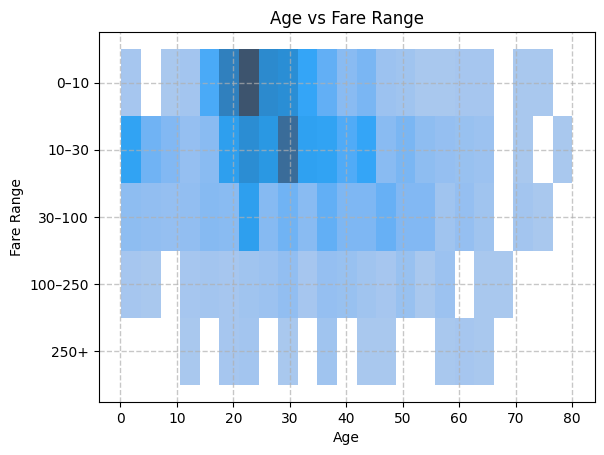

In [14]:

sns.histplot(data=titanic_df, x="Age", y="FareRange")

# Title of Graph
plt.title("Age vs Fare Range")

# X axis Label
plt.xlabel("Age")

# Y axis Label
plt.ylabel("Fare Range")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Which Are The Big Portion of People Category On The Ship (Child - Young - Elder)

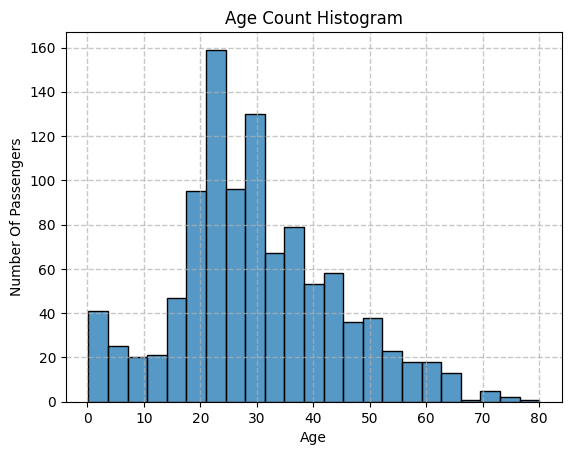

In [ ]:

histogram = sns.histplot(titanic_df['Age'])

# Title of Graph
plt.title("Age Count Histogram")

# X axis Label
plt.xlabel("Age")

# Y axis Label
plt.ylabel("Number Of Passengers")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()


### Who Are The Majority of Passengers From

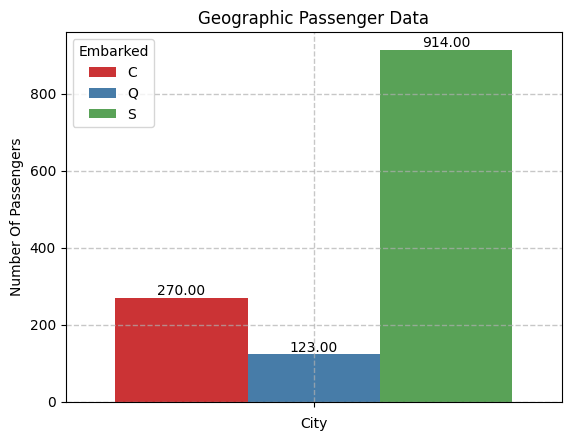

In [ ]:
City_passengers_count = titanic_df.groupby('Embarked').size().reset_index(name="count")

ax = sns.barplot(data=City_passengers_count, hue="Embarked", y="count", palette='Set1')

for i in ax.containers:
    ax.bar_label(i, fmt="%0.2f")

# Title of Graph
plt.title("Geographic Passenger Data")

# X axis Label
plt.xlabel("City")

# Y axis Label
plt.ylabel("Number Of Passengers")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Did Number of People From A Certain Place Had A Better Chance At Survival

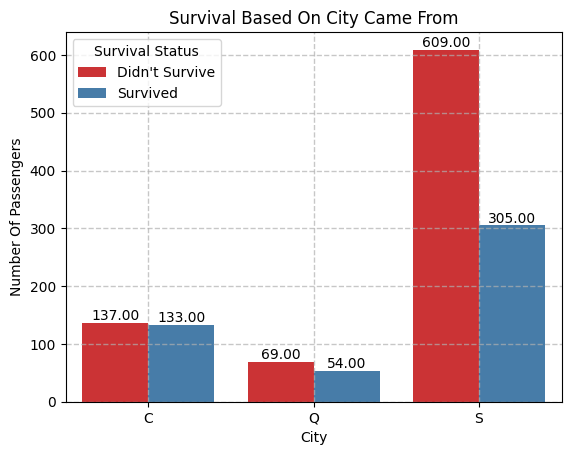

In [ ]:
city_survival = titanic_df.groupby(['Embarked', 'Survived']).size().reset_index(name="count")

city_survival["Survival Status"] = ['Survived' if x == 1 else "Didn't Survive" for x in city_survival['Survived']]

ax = sns.barplot(data=city_survival, x="Embarked", y="count", hue="Survival Status", palette="Set1")

for i in ax.containers:
    ax.bar_label(i, fmt="%.2f")
    
# Title of Graph
plt.title("Survival Based On City Came From")

# X axis Label
plt.xlabel("City")

# Y axis Label
plt.ylabel("Number Of Passengers")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Does Having More Family Members Decreases Survival Probabilities

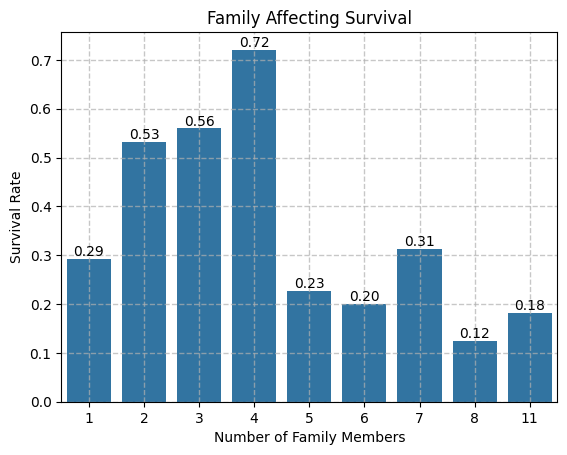

In [ ]:
titanic_df['NumberOfEachFamily'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1


ax = sns.barplot(data=titanic_df, x="NumberOfEachFamily", y="Survived", errorbar=None)


# Add Numbers Above Each Par
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# Title of Graph
plt.title("Family Affecting Survival")

# X axis Label
plt.xlabel("Number of Family Members")

# Y axis Label
plt.ylabel("Survival Rate")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Does Having Parents or Chidren (Mainly Weak People) Number affected survival Rate

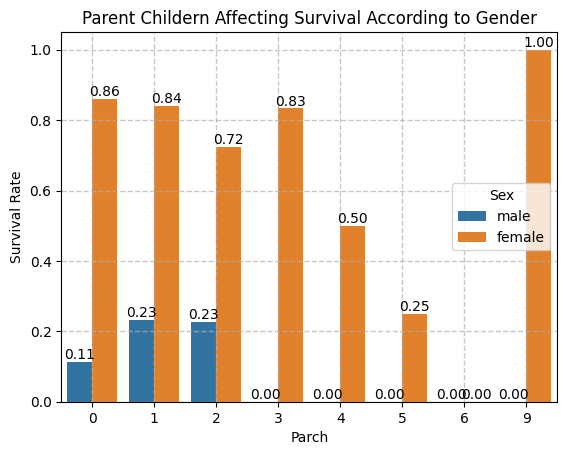

In [15]:

ax = sns.barplot(data=titanic_df, x="Parch", y="Survived", hue="Sex", errorbar=None)

# Add Numbers Above Each Par
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# Title of Graph
plt.title("Parent Childern Affecting Survival According to Gender")

# X axis Label
plt.xlabel("Parch")

# Y axis Label
plt.ylabel("Survival Rate")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Does Having Husband or Siblings (Mainly Strong People) Number affected survival Rate

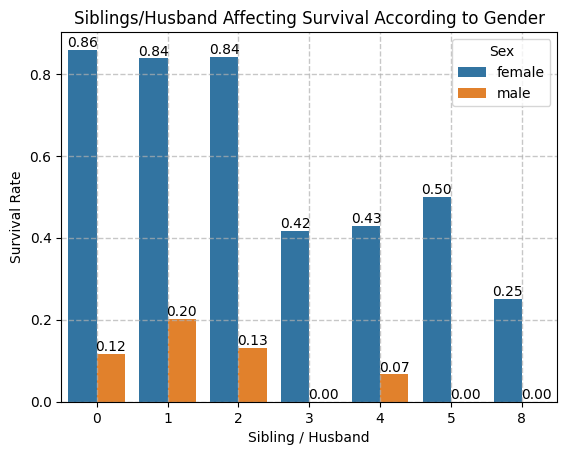

In [17]:

ax = sns.barplot(data=titanic_df, x="SibSp", y="Survived", hue="Sex", errorbar=None)


# Add Numbers Above Each Par
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# Title of Graph
plt.title("Siblings/Husband Affecting Survival According to Gender")

# X axis Label
plt.xlabel("Sibling / Husband")

# Y axis Label
plt.ylabel("Survival Rate")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

## Financial Statistics 

### Does Getting Higher Class Increases Odds of Survival ? 

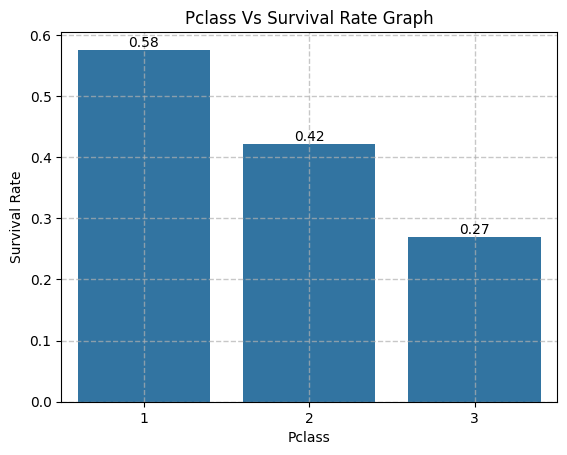

In [ ]:
ax = sns.barplot(data=titanic_df, x="Pclass", y="Survived", errorbar=None)

# Add Numbers Above Each Bar
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# Title of Graph
plt.title("Pclass Vs Survival Rate Graph")

# X axis Label
plt.xlabel("Pclass")

# Y axis Label
plt.ylabel("Survival Rate")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Does Paying More Fare Range Increased Survival Rate ?

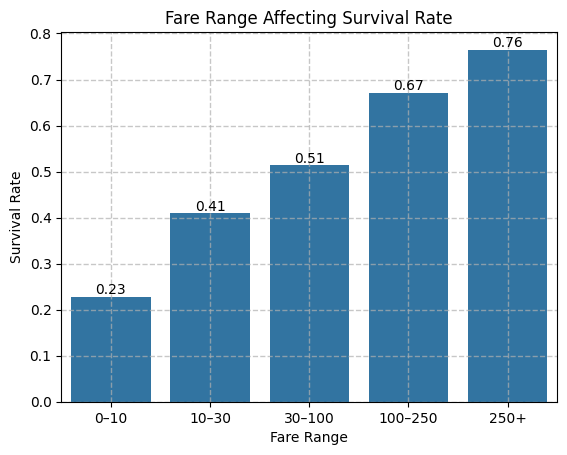

In [ ]:
titanic_df['FareRange'] = pd.cut(titanic_df['Fare'], bins=[0, 10, 30, 100, 250, 600], 
                                 labels=["0–10", "10–30", "30–100", "100–250", "250+"])

ax = sns.barplot(data=titanic_df, x="FareRange", y="Survived", errorbar=None)


# Add Numbers Above Each Par
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# Title of Graph
plt.title("Fare Range Affecting Survival Rate")

# X axis Label
plt.xlabel("Fare Range")

# Y axis Label
plt.ylabel("Survival Rate")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Does Having Cabin Increased Survival Rate

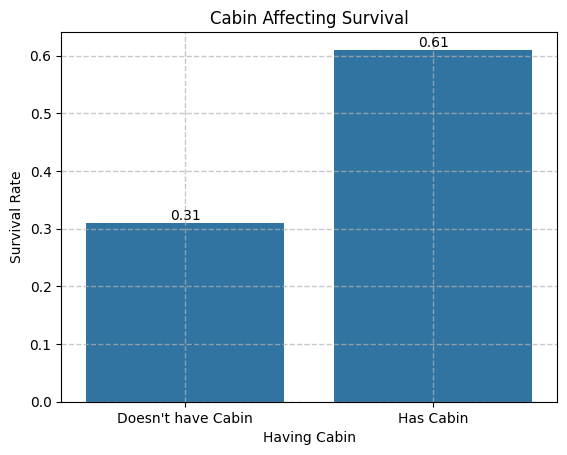

In [18]:
titanic_df['Cabin Availbaility'] = ['Has Cabin' if x == 1 else "Doesn't have Cabin" for x in titanic_df['Cabin'].notnull().astype(int)]

ax = sns.barplot(data=titanic_df, x="Cabin Availbaility", y="Survived", errorbar=None)

# Add Numbers Above Each Par
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# Title of Graph
plt.title("Cabin Affecting Survival")

# X axis Label
plt.xlabel("Having Cabin")

# Y axis Label
plt.ylabel("Survival Rate")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()

### Does Getting Specifc Cabin Level Increased Survival ?

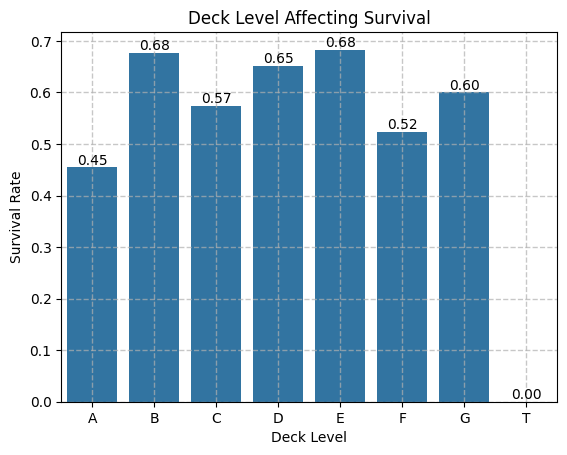

In [ ]:
titanic_df['Deck'] = titanic_df['Cabin'].dropna().str[0]

deck_order = sorted(titanic_df['Deck'].dropna().unique())

ax = sns.barplot(data=titanic_df, x='Deck', y="Survived", order=deck_order, errorbar=None)


# Add Numbers Above Each Par
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# Title of Graph
plt.title("Deck Level Affecting Survival")

# X axis Label
plt.xlabel("Deck Level")

# Y axis Label
plt.ylabel("Survival Rate")

# Add Grid
plt.grid(True, linewidth=1, linestyle='--', alpha=0.7)

# Show Graph
plt.show()